## importing Libs

In [2]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

## Loading Model


In [3]:
cnn = tf.keras.models.load_model('trained_model.keras')

In [4]:
cnn.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

## Visualising Single image of Test set

In [5]:
!pip install opencv-python

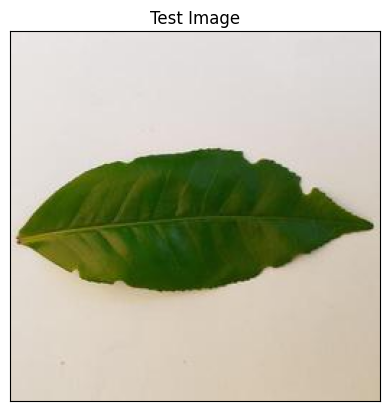

In [6]:
#Test Image Visualization
import cv2
image_path = 'test/healthy/20220101_085850.jpg'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model


In [7]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 [==============================] - 19s 19s/step


In [ ]:
prediction = cnn.predict(input_arr)
prediction, prediction.shape

1/1 [==============================] - 0s 24ms/step


(array([[1.9632725e-10, 7.1105288e-11, 1.0991602e-09, 2.1639095e-09,
         2.1928761e-14, 1.0000000e+00, 1.2586663e-08, 2.7401180e-12]],
       dtype=float32),
 (1, 8))

In [16]:
result_index = np.argmax(prediction) #Return index of max element
print(result_index)

5


In [10]:
class_name = ['Anthracnose',
 'algal leaf',
 'bird eye spot',
 'brown blight',
 'gray light',
 'healthy',
 'red leaf spot',
 'white spot']

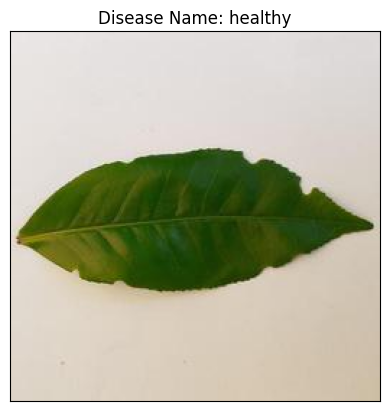

In [11]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

In [12]:
model_prediction

'healthy'